# State Feedback and State Observer

For the following State Space model, with A,B,C,D given by code

$$
\begin{cases}
\dot{x}&=&Ax+Bu\\
y&=&Cx
\end{cases}
$$



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from control import ss,ctrb,obsv,acker,pzmap
from control.matlab import initial


In [2]:
A=np.array([[-2,2,-1],[0,-2,0],[1,-1,0]])
B=np.array([[-1],[1],[-1]])
C=np.array([1,-1,0])
D=0
x0=np.matrix([2,-1,1.6]).transpose()
G=ss(A,B,C,D)

## Controllabilty and Observability

check the Controllabilty and Observability of the system. This decide whether we can design state feedback and state observer

> Theorem 5-4: All poles of LTI system ∑ : 𝒙 = 𝑨𝒙 + 𝑩𝒖, 𝒚 = 𝑪𝒙 could be assigned arbitrarily by using a linear state feedback, 
> if and only if the system is completely controllable.

> Theorem 5-7: For LTI system (𝑨, 𝑩, 𝑪), its observer poles could be assigned arbitrarily
> if and only if the system is observable.


In [3]:
Sc = ctrb(A, B)
So = obsv(A, C)
n = A.shape[0]
rank_Sc = np.linalg.matrix_rank(Sc)
rank_So = np.linalg.matrix_rank(So)
text_c = "controllable" if rank_Sc == n else "uncontrollable"
text_o = "observable" if rank_So == n else "unobservable"
print("rank(Sc)=%d. The system is %s" % (rank_Sc, text_c))
print("rank(So)=%d. The system is %s" % (rank_So, text_o))

rank(Sc)=3. The system is controllable
rank(So)=3. The system is observable


## State Feedback Controller

The system is controllable. So we can design *state feedback controller*, with function [control.acker](https://python-control.readthedocs.io/en/0.9.0/generated/control.acker.html) or [control.place](https://python-control.readthedocs.io/en/0.9.0/generated/control.place.html)

$$
\begin{cases}
\begin{cases}
\dot{x}&=&Ax+Bu\\
y&=&Cx
\end{cases}\\
u=v-Kx
\end{cases}
\Rightarrow
\begin{cases}
\dot{x}=(A-BK)x+Bv\\
y=Cx
\end{cases}
$$

In [4]:
pole=[-1+1j,-2,-1-1j]
K=acker(A,B,pole)
print('K=',K)

K= [[3. 5. 2.]]


In [5]:
A2=A-B*K
G2=ss(A2,B,C,0)
p,z=pzmap(G2,plot=False)
print('now the pole of the system is',p)

now the pole of the system is [-1.+1.j -1.-1.j -2.+0.j]


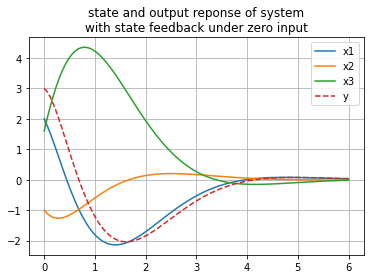

In [6]:
Tfinal=6
y2,t2,x2=initial(G2,X0=x0,T=Tfinal,return_x=True)
plt.plot(t2,x2[:,0],label='x1')
plt.plot(t2,x2[:,1],label='x2')
plt.plot(t2,x2[:,2],label='x3')
plt.plot(t2,y2,'--',label='y')
plt.legend()
plt.title('state and output reponse of system\nwith state feedback under zero input')
plt.grid()
plt.show()

## full-dimension State Observer

The State Space Model of both the system and its observer can be described as:

$$
\begin{cases}
    \begin{pmatrix}
    \dot{x}\\
    \dot{\hat{x}}
    \end{pmatrix}
    =
    \begin{pmatrix}
    A & -BK\\
    HC & A-HC-BK
    \end{pmatrix}
    \begin{pmatrix}
    x\\
    \hat{x}
    \end{pmatrix}
    +
    \begin{pmatrix}
    B \\ B
    \end{pmatrix}
    v
\\
    y=
    \begin{pmatrix}
    C & 0
    \end{pmatrix}
    \begin{pmatrix}
    x\\
    \hat{x}
    \end{pmatrix}
\end{cases}
$$

In [7]:
pole3=[-1,-2,-3]
H=acker(A.transpose(),np.transpose([C]),pole3).transpose()
print('H=',H)

H= [[ 2.]
 [-0.]
 [-2.]]


In [8]:
# K: use the one designed in State feedback Controller session
A3=np.block([[A,-B*K],[H*C,A-H*C-B*K]])
B3=np.block([[B],[B]])
C3=np.block([C,np.zeros((C.shape))])
D3=0
G3=ss(A3,B3,C3,D3)

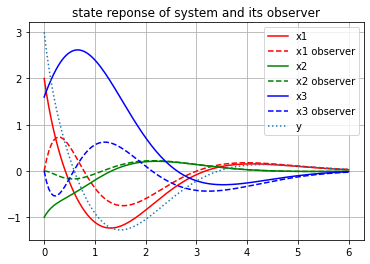

In [9]:
Tfinal=6
x03=np.block([[x0],[np.zeros(x0.shape)]])
y3,t3,x3=initial(G3,X0=x03,T=Tfinal,return_x=True)
plt.plot(t3,x3[:,0],'r',  label='x1')
plt.plot(t3,x3[:,3],'r--',label='x1 observer')
plt.plot(t3,x3[:,1],'g',  label='x2')
plt.plot(t3,x3[:,4],'g--',label='x2 observer')
plt.plot(t3,x3[:,2],'b',  label='x3')
plt.plot(t3,x3[:,5],'b--',label='x3 observer')

plt.plot(t3,y3,':',label='y')

plt.legend()
plt.grid()
plt.title('state reponse of system and its observer')
plt.show()